## Battle of Neighborhoods

In [1]:
!pip install bs4
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

! pip install folium==0.5.0
import folium # plotting library

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
print("...Done")

     |████████████████████████████████| 122kB 14.0MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
     |████████████████████████████████| 112kB 7.2MB/s eta 0:00:01
...Done


In [1]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = ''
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [3]:
address = '2 Tallmadge Cir'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

41.10114755 -81.44055675


In [4]:
search_query = ''
radius = 5000
print(search_query + ' .... OK!')

 .... OK!


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=B0MWRAZKTAX2G3DGROXZJ35OVISR50ODEXZVGOHJNZCMJIU1&client_secret=0MIUGQOYL1COVZXPEO5KEN32YMALVYCAYSZLC4TWIJIZHL3J&ll=41.10114755,-81.44055675&oauth_token=3XXB0R35JHG1XUH44HXRP5U2TJLU5VWC0115MRIL00UPGM4N&v=20180604&query=&radius=5000&limit=1000'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6052a7dea960aa6adb15e486'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4bd32050046076b03f367571',
    'name': 'Taco Bell',
    'location': {'address': '62 Tallmadge Cir',
     'lat': 41.101904958813364,
     'lng': -81.43967910672472,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.101904958813364,
       'lng': -81.43967910672472},
      {'label': 'entrance', 'lat': 41.101955, 'lng': -81.439664}],
     'distance': 111,
     'postalCode': '44278',
     'cc': 'US',
     'city': 'Tallmadge',
     'state': 'OH',
     'country': 'United States',
     'formattedAddress': ['62 Tallmadge Cir', 'Tallmadge, OH 44278']},
    'categories': [{'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'shortName': 'Fast Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suf

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.crossStreet,venuePage.id
0,4bd32050046076b03f367571,Taco Bell,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1616029662,False,62 Tallmadge Cir,41.101905,-81.439679,"[{'label': 'display', 'lat': 41.10190495881336...",111,...,United States,"[62 Tallmadge Cir, Tallmadge, OH 44278]",921657,https://www.grubhub.com/restaurant/taco-bell-6...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
1,52f5553d11d2e2288f60abbc,Little Caesars Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1616029662,False,208 Tallmadge Cir,41.101816,-81.439699,"[{'label': 'display', 'lat': 41.10181624835748...",103,...,United States,"[208 Tallmadge Cir, Tallmadge, OH 44278]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4be5e9512457a593d334ac15,Firehouse Grille & Pub,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1616029662,False,10 Tallmadge Cir,41.100236,-81.440453,"[{'label': 'display', 'lat': 41.10023551302906...",101,...,United States,"[10 Tallmadge Cir (South Ave), Tallmadge, OH 4...",NaN,NaN,NaN,NaN,NaN,NaN,South Ave,NaN
3,588529c3ea29b865e07ac4ff,Country Clean Car Wash,"[{'id': '4f04ae1f2fb6e1c99f3db0ba', 'name': 'C...",v-1616029662,False,NaN,41.099854,-81.437888,"[{'label': 'display', 'lat': 41.099854, 'lng':...",266,...,United States,"[Tallmadge, OH 44333]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4cfe05a12d80a143042c5ad8,Jubilee Donuts,"[{'id': '4bf58dd8d48988d148941735', 'name': 'D...",v-1616029662,False,218 Tallmadge Cir,41.100516,-81.441334,"[{'label': 'display', 'lat': 41.100516, 'lng':...",95,...,United States,"[218 Tallmadge Cir, Tallmadge, OH 44278]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,4fad535fe4b08d12aa717a05,Label Peelers,"[{'id': '4bf58dd8d48988d119951735', 'name': 'W...",v-1616029662,False,211 Cherry St,41.141521,-81.360998,"[{'label': 'display', 'lat': 41.14152100000000...",8044,...,United States,"[211 Cherry St (Franklin Ave), Kent, OH 44240]",NaN,NaN,NaN,NaN,NaN,NaN,Franklin Ave,52287484
112,552bc7b7498eaba11d9dd40e,Summa Health Therapy at Tallmadge Recreation C...,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1616029662,False,46 N Munroe Rd,41.104858,-81.412727,"[{'label': 'display', 'lat': 41.1048583984375,...",2370,...,United States,"[46 N Munroe Rd, Tallmadge, OH 44278]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,5658a685498e51f6df2ded40,Elegant Touch,"[{'id': '4f04aa0c2fb6e1c99f3db0b8', 'name': 'N...",v-1616029662,False,71 West Ave,41.100903,-81.444763,"[{'label': 'display', 'lat': 41.10090255737305...",353,...,United States,"[71 West Ave, Tallmadge, OH 44278]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,4cd5d6967da9a35dbb30ecb9,Romeo's Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1616029662,False,31 Erie Rd,41.100445,-81.437494,"[{'label': 'display', 'lat': 41.10044475566983...",268,...,United States,"[31 Erie Rd, Tallmadge, OH 44278]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Taco Bell,Fast Food Restaurant,62 Tallmadge Cir,41.101905,-81.439679,"[{'label': 'display', 'lat': 41.10190495881336...",111,44278,US,Tallmadge,OH,United States,"[62 Tallmadge Cir, Tallmadge, OH 44278]",NaN,4bd32050046076b03f367571
1,Little Caesars Pizza,Pizza Place,208 Tallmadge Cir,41.101816,-81.439699,"[{'label': 'display', 'lat': 41.10181624835748...",103,44278,US,Tallmadge,OH,United States,"[208 Tallmadge Cir, Tallmadge, OH 44278]",NaN,52f5553d11d2e2288f60abbc
2,Firehouse Grille & Pub,American Restaurant,10 Tallmadge Cir,41.100236,-81.440453,"[{'label': 'display', 'lat': 41.10023551302906...",101,44278,US,Tallmadge,OH,United States,"[10 Tallmadge Cir (South Ave), Tallmadge, OH 4...",South Ave,4be5e9512457a593d334ac15
3,Country Clean Car Wash,Car Wash,NaN,41.099854,-81.437888,"[{'label': 'display', 'lat': 41.099854, 'lng':...",266,44333,US,Tallmadge,OH,United States,"[Tallmadge, OH 44333]",NaN,588529c3ea29b865e07ac4ff
4,Jubilee Donuts,Donut Shop,218 Tallmadge Cir,41.100516,-81.441334,"[{'label': 'display', 'lat': 41.100516, 'lng':...",95,44278,US,Tallmadge,OH,United States,"[218 Tallmadge Cir, Tallmadge, OH 44278]",NaN,4cfe05a12d80a143042c5ad8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Label Peelers,Wine Shop,211 Cherry St,41.141521,-81.360998,"[{'label': 'display', 'lat': 41.14152100000000...",8044,44240,US,Kent,OH,United States,"[211 Cherry St (Franklin Ave), Kent, OH 44240]",Franklin Ave,4fad535fe4b08d12aa717a05
112,Summa Health Therapy at Tallmadge Recreation C...,Doctor's Office,46 N Munroe Rd,41.104858,-81.412727,"[{'label': 'display', 'lat': 41.1048583984375,...",2370,44278,US,Tallmadge,OH,United States,"[46 N Munroe Rd, Tallmadge, OH 44278]",NaN,552bc7b7498eaba11d9dd40e
113,Elegant Touch,Nail Salon,71 West Ave,41.100903,-81.444763,"[{'label': 'display', 'lat': 41.10090255737305...",353,44278,US,Tallmadge,OH,United States,"[71 West Ave, Tallmadge, OH 44278]",NaN,5658a685498e51f6df2ded40
114,Romeo's Pizza,Pizza Place,31 Erie Rd,41.100445,-81.437494,"[{'label': 'display', 'lat': 41.10044475566983...",268,44278,US,Tallmadge,OH,United States,"[31 Erie Rd, Tallmadge, OH 44278]",NaN,4cd5d6967da9a35dbb30ecb9


In [9]:
print(dataframe_filtered.categories.unique())

['Fast Food Restaurant' 'Pizza Place' 'American Restaurant' 'Car Wash'
 'Donut Shop' 'Gas Station' 'Convenience Store' 'Italian Restaurant'
 'Indian Restaurant' 'Pharmacy' 'Medical Lab' "Doctor's Office"
 'Mexican Restaurant' 'Breakfast Spot' 'Coffee Shop' 'Cupcake Shop'
 'Assisted Living' 'Urgent Care Center' 'Hardware Store'
 'Salon / Barbershop' 'Cosmetics Shop' 'Baseball Field' 'Tanning Salon'
 'Bank' 'Ice Cream Shop' 'Smoothie Shop' 'Cemetery' 'Funeral Home'
 'Health & Beauty Service' 'Shipping Store' 'Sandwich Place'
 'Spiritual Center' 'Monument / Landmark' 'Event Space' 'Nail Salon'
 'Rest Area' None 'Other Great Outdoors' 'Frozen Yogurt Shop'
 'Automotive Shop' 'Historic Site' 'Office' 'Thrift / Vintage Store' 'Gym'
 'Grocery Store' 'Miscellaneous Shop' 'City Hall' 'Gift Shop'
 'Chinese Restaurant' 'Church' 'Tech Startup' 'Building'
 "Dentist's Office" 'Bakery' 'Financial or Legal Service' 'Fabric Shop'
 'Police Station' 'Law School' 'Optical Shop' 'Athletics & Sports'
 'Insur

In [10]:
valuelist = ["Fast Food Restaurant", "Indian Restaurant", "Mexican Restaurant", "Pizza Place", "Cupcake Shop", "Smoothie Shop", "American Restaurant", "Coffee Shop", "Breakfast Spot", 
             "Ice Cream Shop", "Frozen Yogurt Shop", "Thrift / Vintage Store", "Gift Shop", "Donut Shop", "Italian Restaurant", "Sandwich Place", "Miscellaneous Shop", "Chinese Restaurant", 
             "Bakery", "Wine Shop"]
# I filtered out everything that wasn't a shop. There are a lot of other business around this center spot.
newdf= dataframe_filtered[dataframe_filtered['categories'].isin(valuelist)]
newdf

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Taco Bell,Fast Food Restaurant,62 Tallmadge Cir,41.101905,-81.439679,"[{'label': 'display', 'lat': 41.10190495881336...",111,44278,US,Tallmadge,OH,United States,"[62 Tallmadge Cir, Tallmadge, OH 44278]",NaN,4bd32050046076b03f367571
1,Little Caesars Pizza,Pizza Place,208 Tallmadge Cir,41.101816,-81.439699,"[{'label': 'display', 'lat': 41.10181624835748...",103,44278,US,Tallmadge,OH,United States,"[208 Tallmadge Cir, Tallmadge, OH 44278]",NaN,52f5553d11d2e2288f60abbc
2,Firehouse Grille & Pub,American Restaurant,10 Tallmadge Cir,41.100236,-81.440453,"[{'label': 'display', 'lat': 41.10023551302906...",101,44278,US,Tallmadge,OH,United States,"[10 Tallmadge Cir (South Ave), Tallmadge, OH 4...",South Ave,4be5e9512457a593d334ac15
4,Jubilee Donuts,Donut Shop,218 Tallmadge Cir,41.100516,-81.441334,"[{'label': 'display', 'lat': 41.100516, 'lng':...",95,44278,US,Tallmadge,OH,United States,"[218 Tallmadge Cir, Tallmadge, OH 44278]",NaN,4cfe05a12d80a143042c5ad8
5,Pizza BOGO,Pizza Place,NaN,41.100461,-81.440245,"[{'label': 'display', 'lat': 41.100461, 'lng':...",80,44278,US,Tallmadge,OH,United States,"[Tallmadge, OH 44278]",NaN,596c07e0a6031c5daa3a983d
8,McDonald's,Fast Food Restaurant,23 Southeast Ave,41.100595,-81.439114,"[{'label': 'display', 'lat': 41.100595236731, ...",135,44278,US,Tallmadge,OH,United States,"[23 Southeast Ave, Tallmadge, OH 44278]",NaN,4bb3b59142959c745055222c
9,Arby's,Fast Food Restaurant,30 East Ave,41.101084,-81.438998,"[{'label': 'display', 'lat': 41.101084, 'lng':...",130,44278,US,Tallmadge,OH,United States,"[30 East Ave, Tallmadge, OH 44278]",NaN,4baa4b32f964a520e75b3ae3
10,Danny Boy's,Italian Restaurant,10 Tallmadge Cir,41.100330,-81.440305,"[{'label': 'display', 'lat': 41.10032976756768...",93,44278,US,Tallmadge,OH,United States,"[10 Tallmadge Cir, Tallmadge, OH 44278]",NaN,570c1656498ebf4c77f895fb
11,Global Kitchen,Indian Restaurant,12 Tallmadge Cir,41.100092,-81.440319,"[{'label': 'display', 'lat': 41.100092, 'lng':...",119,44278,US,Tallmadge,OH,United States,"[12 Tallmadge Cir, Tallmadge, OH 44278]",NaN,5b22e2b06a5950002c214775
15,El Tren Grill,Mexican Restaurant,70 East Ave,41.101200,-81.437981,"[{'label': 'display', 'lat': 41.1012, 'lng': -...",216,44278,US,Tallmadge,OH,United States,"[70 East Ave, Tallmadge, OH 44278]",NaN,55c53577498e6a7ffd968c63


In [11]:
newdf_gp = newdf.groupby("categories").size().reset_index(name = '# of Restaurants')
sorted_df = newdf_gp.sort_values("# of Restaurants", ascending= True)
sorted_df

,categories,# of Restaurants
19,Wine Shop,1
1,Bakery,1
2,Breakfast Spot,1
3,Chinese Restaurant,1
17,Smoothie Shop,1
14,Miscellaneous Shop,1
12,Italian Restaurant,1
8,Frozen Yogurt Shop,1
18,Thrift / Vintage Store,1
11,Indian Restaurant,1


In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt

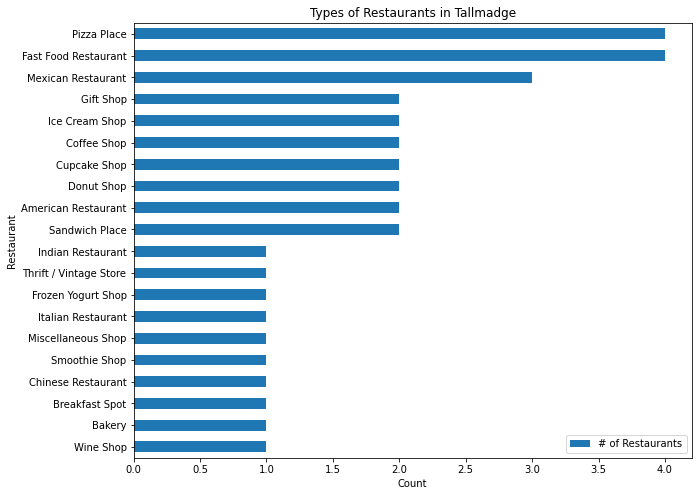

In [13]:
ax= sorted_df.plot(kind='barh', figsize=(10, 8), rot=0)
plt.ylabel('Restaurant')
plt.xlabel('Count')
plt.title('Types of Restaurants in Tallmadge')
ax.set_yticklabels(sorted_df.categories)


plt.show()

In [16]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around Tallmadge Circle

# add a red circle marker to represent the Tallmadge Circle
folium.CircleMarker([latitude, longitude],radius=10,color='red',popup='Tallmadge Circle',fill = True,fill_color = 'red',fill_opacity = 0.6).add_to(venues_map)

# add the businesses
for lat, lng, label in zip(newdf.lat, newdf.lng, newdf.categories):
    folium.CircleMarker([lat, lng], radius=1, color='blue',popup= label, fill = True, fill_color='blue', fill_opacity=0.6).add_to(venues_map)

# display map
venues_map